# ====== GOODREADS ANALYSIS ======

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [215]:
df = pd.read_csv('books.csv')
df.head(2)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,517226952,9780517226957,eng,815,3628,254,11/01/2005,Gramercy Books
1,2,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,345453743,9780345453747,eng,815,249558,4080,04/30/2002,Del Rey Books


In [216]:
df['publication_date'] = pd.to_datetime(df['publication_date'])

In [217]:
df.dtypes

bookID                         int64
title                         object
authors                       object
average_rating               float64
isbn                          object
isbn13                         int64
language_code                 object
num_pages                      int64
ratings_count                  int64
text_reviews_count             int64
publication_date      datetime64[ns]
publisher                     object
dtype: object

In [218]:
df.shape

(11127, 12)

In [219]:
df['language_code'].unique()

array(['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', 'enm',
       'en-CA', 'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por', 'srp',
       'ita', 'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'tur', 'gla',
       'ale'], dtype=object)

In [220]:
df[df['language_code']== 'fre'].count()

bookID                144
title                 144
authors               144
average_rating        144
isbn                  144
isbn13                144
language_code         144
num_pages             144
ratings_count         144
text_reviews_count    144
publication_date      144
publisher             144
dtype: int64

# ------------- POPULARITY --------------

There are two data points relating to book popularity in this database: average ratings and ratings count. I am determining popularity as a book having a large number of ratings (> 1000) and a high average rating (>4.5/4.0).

## Popularity: What is the most popular book?

In [221]:
df['average_rating'].max()

5.0

In [222]:
df['average_rating'].min()

0.0

In [223]:
def most_pop(df, threshold):
    most_pop_filter = (df["average_rating"]>threshold) & (df["ratings_count"] > 1000)
    popular = df.loc[most_pop_filter]
    return popular.sort_values(by=["average_rating"], ascending=False)[:1]

most_pop(df, 4.5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
6590,24812,The Complete Calvin and Hobbes,Bill Watterson,4.82,740748475,9780740748479,eng,1456,32213,930,2005-09-06,Andrews McMeel Publishing


## Popularity: Most popular book in the 1960's
Following the popularity decisions above, I used Timestamp() to grab the books published between Jan 1st, 1960 and Dec 31st, 1969. After running the filter to show books with a rating above 4.5 returned nothing, I lowered the threshold to 4.0.

In [224]:
sixties = df[ (df['publication_date'] > pd.Timestamp(1960,1,1)) 
             & (df['publication_date']< pd.Timestamp(1969,12,31))]

most_pop(sixties, threshold=4.0)


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
3038,11225,One Flew Over the Cuckoo's Nest,Ken Kesey,4.2,451137094,9780451137098,eng,272,1120,104,1963-02-01,Signet


## Popularity: What is the least popular book of the 90's ?
First, I found all of the books published between Jan 1st, 1990 and Dec 31st, 1999. Then I found all of the books in the 90s with at least 1000 ratings to remove books with zero ratings and therefore an average rating of zero. Then I sorted those books by average rating, descending to find the lowest-rated book in the 90s.

In [225]:
nighties = df[ (df['publication_date'] > pd.Timestamp(1990,1,1)) & (df['publication_date'] < pd.Timestamp(1999,12,31)) ]
nighties

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
4,8,The Ultimate Hitchhiker's Guide (Hitchhiker's ...,Douglas Adams,4.38,517149257,9780517149256,eng,815,2877,195,1996-01-17,Wings Books
17,26,The Lost Continent: Travels in Small Town America,Bill Bryson,3.83,60920084,9780060920081,eng,299,45712,2257,1990-08-28,William Morrow Paperbacks
18,27,Neither Here nor There: Travels in Europe,Bill Bryson,3.86,380713802,9780380713806,eng,254,48701,2238,1993-03-28,William Morrow Paperbacks
19,28,Notes from a Small Island,Bill Bryson,3.91,380727501,9780380727506,eng,324,80609,3301,1997-05-28,William Morrow Paperbacks
20,29,The Mother Tongue: English and How It Got That...,Bill Bryson,3.93,380715430,9780380715435,eng,270,28489,2085,1991-09-28,William Morrow Paperbacks
...,...,...,...,...,...,...,...,...,...,...,...,...
11103,45557,Co. Aytch: A Confederate Memoir of the Civil War,Sam R. Watkins,4.13,684833247,9780684833248,eng,240,23,2,1997-08-12,Touchstone Books
11104,45564,Jonny Reb & Billy Yank,Alexander Hunter,4.11,1568520808,9781568520803,eng,635,14,2,1998-05-31,Not Avail
11107,45572,Fantastic Mr. Fox (Cover to Cover),Roald Dahl,4.05,1855495090,9781855495098,eng,90,7,0,1995-09-15,BBC Audiobooks
11121,45630,Whores for Gloria,William T. Vollmann,3.69,140231579,9780140231571,en-US,160,932,111,1994-02-01,Penguin Books


In [253]:
def worst_pop(df, threshold):
    worst_pop_filter = (df["average_rating"]<threshold) & (df["ratings_count"] > 500)
    worst = df.loc[worst_pop_filter]
    return worst.sort_values(by=["average_rating"], ascending=True)[:1]

worst_pop(df, 3)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,most_pop_book_per_publisher
8815,33993,Citizen Girl,Emma McLaughlin/Nicola Kraus,2.4,743266862,9780743266864,en-US,305,5415,577,2005-10-04,Washington Square Press,


## Popularity: are books with fewer pages rated higher than books with more pages ?

Filtering the results based on the number of pages and then secondarily, the number of ratings to make sure the rating given to the book is supported by many users.

There is a difference of 1.6 between the two books. Books with more pages could be higher rated? I have to perform more analysis to prove this fact.

In [227]:
few_pages = df[df['num_pages'] < 300]
few_pages = few_pages[few_pages['ratings_count'] > 1000]
few_pages.sort_values(by=["average_rating"], ascending=False) 
few_pages[:1]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
2,4,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,1400052920,9781400052929,eng,215,4930,460,2004-08-03,Crown


In [228]:
many_pages =  df[df['num_pages'] > 300]
many_pages = many_pages[many_pages['ratings_count'] > 1000]
many_pages.sort_values(by=["average_rating"], ascending=False) 
many_pages[:1]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,517226952,9780517226957,eng,815,3628,254,2005-11-01,Gramercy Books


## Popularity : is there a correlation between popularity and number of pages? 

A chart showing the ratings vs. the number of pages would better show if there is a correlation here.

In [229]:
def most_pops(df, num):
    most_pop_filter = (df["average_rating"]>4.0) & (df["ratings_count"] > 1000)
    popular = df.loc[most_pop_filter]
    return popular.sort_values(by=["average_rating"], ascending=False)[:num]

#most_pops(df, 10)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

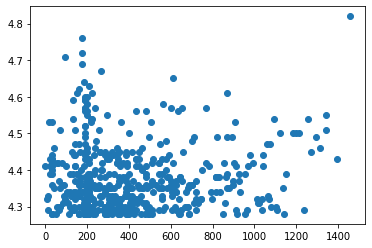

In [230]:
mosts = most_pops(df, 500)[most_pops(df, 500)['num_pages'] <=1500]

plt.scatter(mosts[['num_pages']], mosts[['average_rating']])
plt.plot

## Popularity : plotting the repartition of average_ratings for books with more that 1000 reviews.

# ----------- NUMBER OF PAGES --------------

## Pages : the biggest book?

In [231]:
most = df.sort_values(by=["num_pages"], ascending=False)[:1]
most

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
6500,24520,The Complete Aubrey/Maturin Novels (5 Volumes),Patrick O'Brian,4.7,039306011X,9780393060119,eng,6576,1338,81,2004-10-17,W. W. Norton Company


## Pages: Which author wrote the most pages?

First, I found all of the unique authors in the dataset since many authors have written more than one book. I then looped through the data to grab the number of pages for each book an author has written and used sum() to get their total page count. Then the total pages we compared to find the author who had the most were Stephen King with 18219 pages.

In [232]:
df.loc[df['authors']=="Dan Brown",'num_pages' ].sum()

6836

In [233]:
max = 0
best =""

authors = df['authors'].unique()
for author in authors:
    number_pages = df.loc[df['authors']==author,'num_pages' ].sum()
    n_books = df.loc[df['authors']=="Stephen King", 'title'].count()
    if number_pages > max:
        max = number_pages
        best = author
(max, best, n_books)

(18219, 'Stephen King', 40)

I have applied anoter method using pivot_table function with authors as an index and num_pages as values summing the pages. 

In [234]:
pivot = df.pivot_table(index=['authors'], values=['num_pages'], aggfunc='sum')
pivot.sort_values(by=['num_pages'], ascending=False)[:20]

,num_pages
authors,
Stephen King,18219
Orson Scott Card,14066
J.R.R. Tolkien,12537
Dan Simmons,11700
P.G. Wodehouse,11619
Mercedes Lackey,11480
Piers Anthony,10883
Agatha Christie,10556
Laurell K. Hamilton,10219


## Pages: What's an author average page count?
I used the code from the previous question that gathers an author's total page count and divided it by the total number of books an author has written to get their average number of pages written per book.

In [235]:
def average_page(author):
    number_pages = df.loc[df['authors']==author,'num_pages' ].sum()
    n_books = df.loc[df['authors']==author, 'title'].count()
    return round(number_pages/n_books) 
author = "Stephen King"
f"Books written by {author} have an average of {average_page(author)} pages"

'Books written by Stephen King have an average of 455 pages'

In [236]:
author = "Agatha Christie"
f"Books written by {author} have an average of {average_page(author)} pages"

'Books written by Agatha Christie have an average of 320 pages'

## Pages: How many books have been written with less than 200 pages?
I filtered the books to find all with num_pages less than 200 and then took the length of the returned value. There are currently 2898 books in the dataset with less than 200 pages.

In [237]:
less_200 = df[df['num_pages'] < 200]
f"{round(len(less_200)/len(df) *100, 2)}% of books are less that 200 pages"

'26.04% of books are less that 200 pages'

## Pages: What is the highest rated book with over 500 pages ?
First, I found books with over 500 pages and more than 1000 ratings. Then I sorted the books by average rating in descending order to find the highest-rated book with over 500 pages.

In [257]:
df1 = df[df['num_pages']>=500]
df1 = df1[df1['ratings_count'] > 1000]
highest_500p = df1.sort_values(by='average_rating', ascending=False)[:1]
highest_500p

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,most_pop_book_per_publisher
6590,24812,The Complete Calvin and Hobbes,Bill Watterson,4.82,740748475,9780740748479,eng,1456,32213,930,2005-09-06,Andrews McMeel Publishing,The Complete Calvin and Hobbes


## Pages: Plotting the repartition of books by number of pages

# ---------- NUMBER OF REVIEWS --------------

- What is the most reviewed book ?
- Is there a correlation between number of reviews and rating (maybe we are more willing to give a rating to a book we appreciate
- link with the number of text reviews
- link with the date of publication

In [260]:
df.sort_values(by='ratings_count', ascending= False)[:10]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,most_pop_book_per_publisher
10340,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,316015849,9780316015844,eng,501,4597666,94265,2006-09-06,Little Brown and Company,
1697,5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,618260307,9780618260300,eng,366,2530894,32871,2002-08-15,Houghton Mifflin,
1462,5107,The Catcher in the Rye,J.D. Salinger,3.80,316769177,9780316769174,eng,277,2457092,43499,2001-01-30,Back Bay Books,
307,960,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,1416524797,9781416524793,eng,736,2418736,21303,2006-04-01,Pocket Books,
10,16,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,Harry Potter and the Half-Blood Prince (Harry ...
4416,15881,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré,4.42,439064864,9780439064866,eng,341,2293963,34692,1999-06-02,Arthur A. Levine Books / Scholastic Inc.,
8,13,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,Harry Potter and the Half-Blood Prince (Harry ...
23,34,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.36,618346252,9780618346257,eng,398,2128944,13670,2003-09-05,Houghton Mifflin Harcourt,The Lord of the Rings: The Art of the Fellowsh...
2114,7613,Animal Farm,George Orwell/Boris Grabnar/Peter Škerl,3.93,452284244,9780452284241,eng,122,2111750,29677,2003-05-06,NAL,
7,12,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,Harry Potter and the Half-Blood Prince (Harry ...


## ---------NUMBER OF TEXT REVIEWS ----------

In [261]:
df.sort_values(by='text_reviews_count', ascending=False)[:10]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,most_pop_book_per_publisher
10340,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,316015849,9780316015844,eng,501,4597666,94265,2006-09-06,Little Brown and Company,
5272,19063,The Book Thief,Markus Zusak/Cao Xuân Việt Khương,4.37,375831002,9780375831003,eng,552,1516367,86881,2006-03-14,Alfred A. Knopf,
1069,3636,The Giver (The Giver #1),Lois Lowry,4.13,385732554,9780385732550,eng,208,1585589,56604,2006-01-24,Ember,
284,865,The Alchemist,Paulo Coelho/Alan R. Clarke/Özdemir İnce,3.86,61122416,9780061122415,eng,197,1631221,55843,1993-05-01,HarperCollins,
10704,43641,Water for Elephants,Sara Gruen,4.09,1565125606,9781565125605,eng,335,1260027,52759,2007-05-01,Algonquin Books,
7312,28187,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,4.25,786838655,9780786838653,eng,375,1766725,47951,2006-03-01,Disney Hyperion Books,
5409,19501,Eat Pray Love,Elizabeth Gilbert,3.55,143038419,9780143038412,eng,368,1362264,47620,2007-02-01,Riverhead Books,
2060,7445,The Glass Castle,Jeannette Walls,4.27,074324754X,9780743247542,eng,288,808656,46176,2006-01-17,Scribner,
1462,5107,The Catcher in the Rye,J.D. Salinger,3.80,316769177,9780316769174,eng,277,2457092,43499,2001-01-30,Back Bay Books,
10,16,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,Harry Potter and the Half-Blood Prince (Harry ...


# ------------- PUBLISHER -----------------

## Publisher : What are the top publishers in term of number of books published?

In [238]:
len(df['publisher'].unique())

2291

In [239]:
book_publisher = df.pivot_table(index=['publisher'], values='bookID', aggfunc='count')
book_publisher = book_publisher.sort_values(by=['bookID'],ascending=False)
book_publisher.head(3)

,bookID
publisher,
Vintage,318
Penguin Books,261
Penguin Classics,184


In [240]:
total_books = book_publisher.sum()
total_books

bookID    11127
dtype: int64

In [241]:
book_publisher.index

Index(['Vintage', 'Penguin Books', 'Penguin Classics', 'Mariner Books',
       'Ballantine Books', 'Harper Perennial', 'HarperCollins', 'Pocket Books',
       'Bantam', 'VIZ Media LLC',
       ...
       'Nicholas Brealey', 'Do-Not Press', 'Newmarket',
       'New York: Random House', 'Dodd Mead; 1st edition (September 1976)',
       'Doherty  Tom Associates  LLC', 'New York Review Children's Collection',
       'New York : Penguin Books', 'New World Publishing',
       'Limitless Corporation'],
      dtype='object', name='publisher', length=2291)

In [242]:
def top_publisher(df, num):
    pivot = df.pivot_table(index=['publisher'], values='bookID', aggfunc='count')
    pivot = pivot.sort_values(by=['bookID'],ascending=False)
    top_publisher = pivot[:num]
    return top_publisher
top_ten_publisher = top_publisher(df, 10)
top_ten_publisher

,bookID
publisher,
Vintage,318
Penguin Books,261
Penguin Classics,184
Mariner Books,150
Ballantine Books,144
Harper Perennial,112
HarperCollins,112
Pocket Books,111
Bantam,110


In [243]:
top_ten_publisher.sum()

bookID    1590
dtype: int64

## Publisher : What is publisher Houghton Mifflin Harcourt’s most popular book?
First, I found all of the books with Houghton Mifflin Harcourt as the publisher. Then I filtered the books by the number of ratings (> 1000) and then sorted them by the average rating to find their most popular book.

In [246]:
def most_pop_per_publisher(df, publisher):
    result = df[df['publisher']==publisher]
    return most_pop(result, 4.5)
title = most_pop_per_publisher(df, 'Houghton Mifflin Harcourt' )['title'].values[0]
author = most_pop_per_publisher(df, 'Houghton Mifflin Harcourt' )['authors'].values[0]
f"{title} by {author}"

'The Lord of the Rings: The Art of the Fellowship of the Ring by Gary Russell'

## c. Publisher : What is publishers' most popular book?

In [247]:
book_publisher.index

Index(['Vintage', 'Penguin Books', 'Penguin Classics', 'Mariner Books',
       'Ballantine Books', 'Harper Perennial', 'HarperCollins', 'Pocket Books',
       'Bantam', 'VIZ Media LLC',
       ...
       'Nicholas Brealey', 'Do-Not Press', 'Newmarket',
       'New York: Random House', 'Dodd Mead; 1st edition (September 1976)',
       'Doherty  Tom Associates  LLC', 'New York Review Children's Collection',
       'New York : Penguin Books', 'New World Publishing',
       'Limitless Corporation'],
      dtype='object', name='publisher', length=2291)

In [248]:
for publisher in book_publisher.index:
    #print(publisher)
    #print(most_pop_per_publisher(df, publisher))
    if most_pop_per_publisher(df, publisher )['title'].values.size == 0:
        df.loc[df['publisher']==publisher, 'most_pop_book_per_publisher']= ''
    else:
        df.loc[df['publisher']==publisher, 'most_pop_book_per_publisher'] = most_pop_per_publisher(df, publisher )['title'].values[0]
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,most_pop_book_per_publisher
0,1,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,517226952,9780517226957,eng,815,3628,254,2005-11-01,Gramercy Books,
1,2,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,345453743,9780345453747,eng,815,249558,4080,2002-04-30,Del Rey Books,
2,4,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,1400052920,9781400052929,eng,215,4930,460,2004-08-03,Crown,
3,5,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams/Stephen Fry,4.22,739322206,9780739322208,eng,6,1266,253,2005-03-23,Random House Audio,
4,8,The Ultimate Hitchhiker's Guide (Hitchhiker's ...,Douglas Adams,4.38,517149257,9780517149256,eng,815,2877,195,1996-01-17,Wings Books,


In [124]:
def top_publisher_book_author(number):
    top_publishers = top_publisher(df, number).index
    top_book_publisher = pd.DataFrame(np.zeros((number, 2)), index=top_publishers, columns=['best book', 'authors'])
    top_book_publisher['best book'] = np.arange(number)
    best_books=[]
    authors=[]

    for publisher in top_publishers:
        title = most_pop_per_publisher(df, publisher )['title'].values[0]
        author = most_pop_per_publisher(df, publisher )['authors'].values[0]
        best_books.append(title)
        authors.append(author)

    top_book_publisher['authors'] = authors
    top_book_publisher['best book'] = best_books
    return top_book_publisher

number = 20
top_publisher_book_author(number)

,best book,authors
publisher,,
Vintage,The Power Broker: Robert Moses and the Fall of...,Robert A. Caro
Penguin Books,The Complete Maus,Art Spiegelman
Penguin Classics,In the Shadow of Young Girls in Flower (In Sea...,Marcel Proust/James Grieve/Christopher Prender...
Mariner Books,The Return of the King (The Lord of the Rings ...,J.R.R. Tolkien
Ballantine Books,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien
Harper Perennial,Full Woman Fleshly Apple Hot Moon: Selected ...,Pablo Neruda/Stephen Mitchell
HarperCollins,The Missing Piece Meets the Big O,Shel Silverstein
Pocket Books,Boy's Life,Robert R. McCammon
Bantam,Gates of Fire,Steven Pressfield


## ----------- IDEAS FOR A BOOK APP -------------

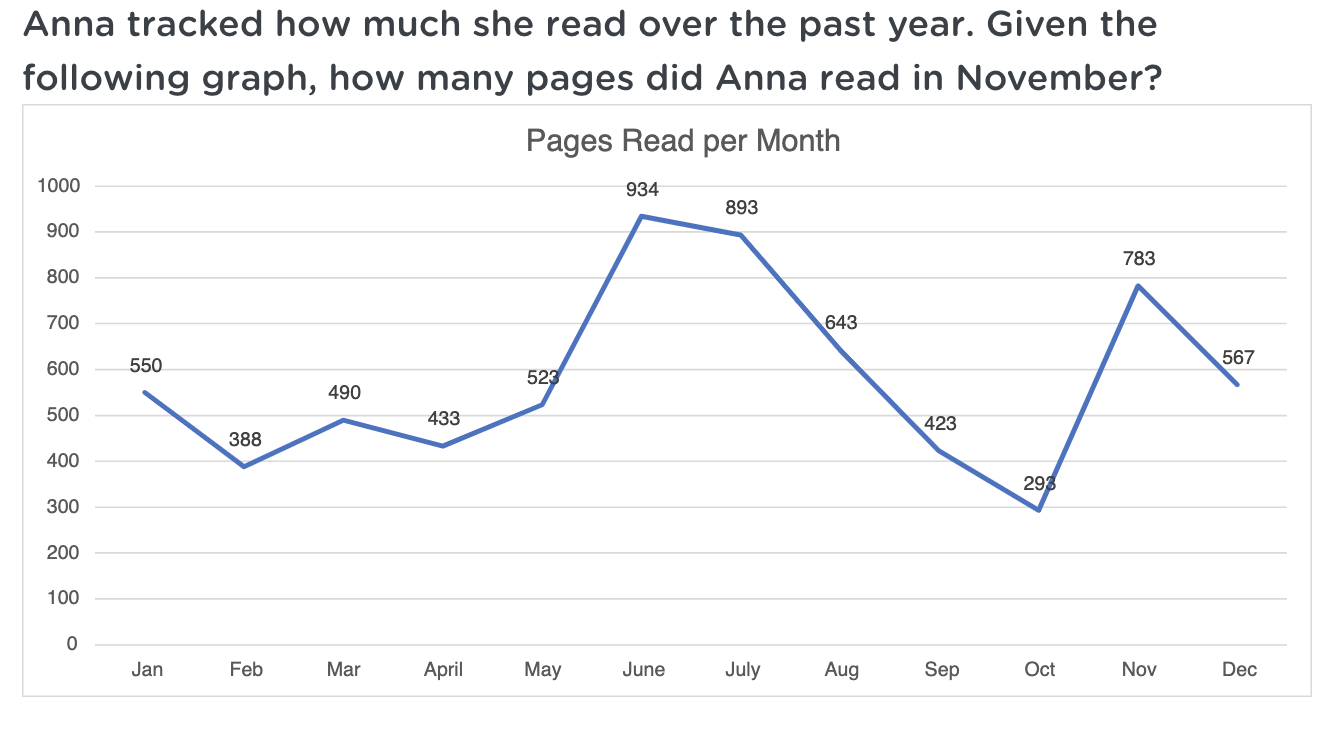